**Computer Vision for Produce Quality in Fruit**

Reference:

* TensorFlow/Keras documentation: https://www.tensorflow.org/
* Deep Learning book (Ian Goodfellow, Yoshua Bengio, and Aaron Courville): http://www.deeplearningbook.org/
* Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow (Aurélien Géron)
* Multilabel Fruits Classification | CNN | Keras' kaggle.com Devashree Madhugiri https://www.kaggle.com/code/devsubhash/multilabel-fruits-classification-cnn-keras
* SVMClassification_OnAppledatasetOpenCV https://github.com/sarathbabu123/SVMClassification_OnAppledatasetOpenCV

This project proposes a method involving the deep learning technique which is CNN for feature extraction and classification of defect fruits. It is one of the applications of image classification problems. This approach uses an RGB channel image of the fruit under examination.

Use Case: Detecting Defect Fruits

With Deep Learning's capabilities, fruit classification can be well implemented as a replacement of traditional manual methods in the agricultural, horticultural and botany domains. By utilizing these models,we can introduce efficiency and accuracy into various fruit-related processes.

Fruit classification can assist in inventory management for grocery stores and warehouses. With the ability to automatically classify and count different fruits in stock, businesses can optimize their supply chain and ensure adequate stock levels.

Deep Learning can aid in identifying spoiled fruits, such as detecting fungus presence on their skin. By automating this process, we can minimize waste and enhance the quality control in fruit distribution centers.

By analyzing fruit images, Deep Learning models can spot signs of diseases or pests affecting the fruit's health. Early detection enables timely intervention, preventing the spread of diseases and safeguarding crop yields.

**1.1 Importing Required Libraries and Packages**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import sys
import pandas as pd
import keras
import seaborn as sns
import pickle
import cv2 as cv

from sklearn.svm import SVC
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import os

# Clone the repository
os.system('git clone https://github.com/sallez9/SCTPAIMLcapstone.git')

print("Dataset downloaded successfully!")

Cloning into 'SCTPAIMLcapstone'...


Dataset downloaded successfully!


In [3]:
#load the dataset
#with tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = 'SCTPAIMLcapstone/Training'
test_dir = 'SCTPAIMLcapstone/Test'

# Data generators for training and testing, normalise image to 255, target size 180by180, batch size 32
# Preprocess the image to match the input shape expected by the model

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical'
)

print("Data loaded successfully!")

Found 1096 images belonging to 3 classes.
Found 547 images belonging to 3 classes.
Data loaded successfully!


In [14]:
# Define the root directory of the dataset
root_dir = 'SCTPAIMLcapstone/Training'

# List all subdirectories (i.e., apple fruit classes)
apple_classes = os.listdir(root_dir)
print("Apple Classes:", apple_classes)

# List the first few images in the 'apple_red_1' class folder
apple_dir = os.path.join(root_dir, 'apple_red_1')
apple_images = os.listdir(apple_dir)
print("1st five Apple Images:", apple_images[:5])  # Print first 5 images in the Apple directory

num_classes = len(apple_classes)


Apple Classes: ['apple_red_1', 'apple_rotten_1', 'apple_hit_1']
1st five Apple Images: ['r0_14.jpg', 'r1_94.jpg', 'r1_66.jpg', 'r1_152.jpg', 'r1_226.jpg']


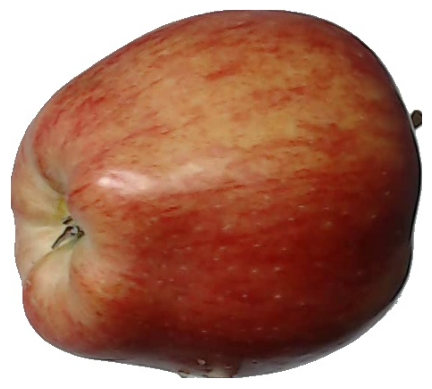

In [8]:
# Load an example image
# with PIL
from PIL import Image

import matplotlib.pyplot as plt

image_path = os.path.join(apple_dir, 'r1_94.jpg')  # Adjust the path as necessary
image = Image.open(image_path)

# Show the image
#image.show()

# Display the image with matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

In [10]:
batch_size = 32
img_height = 180
img_width = 180

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [
        layers.Input(shape=(img_height, img_width, 3)),  # Define the input shape here
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

In [15]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='tanh'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
epochs = 10
history = model.fit(
  train_datagen,
  validation_data=val_datagen,
  epochs=epochs
)

ValueError: Unrecognized data type: x=<keras.src.legacy.preprocessing.image.ImageDataGenerator object at 0x7da5a0f9f5b0> (of type <class 'keras.src.legacy.preprocessing.image.ImageDataGenerator'>)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.summary()

In [ ]:
img_url = "https://www.punjabricemills.com/assets/img/Super-Kernel-Basmati.png"
img_path = tf.keras.utils.get_file('test_grain_skb', origin=img_url)

img = tf.keras.utils.load_img(
    img_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

In [ ]:
from tensorflow.keras.models import save_model, load_model

#save_model(model, "ricemodel_beras.keras")

In [ ]:
confusion_matrix = np.zeros((num_classes, num_classes))

for images, labels in val_ds:
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    confusion_matrix += tf.math.confusion_matrix(labels, predicted_classes).numpy()

# Normalize confusion matrix if needed


In [ ]:
confusion_matrix

In [ ]:
import seaborn as sns

sns.heatmap(confusion_matrix, annot=True, fmt='g',
            xticklabels=class_names, yticklabels=class_names, cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**Capture image via Camera**

Steps in the Code:
1. Capture Video Stream: Open the webcam stream using cv2.VideoCapture(0).
2. Frame Processing: Convert each captured frame to grayscale (placeholder for your quality inspection algorithm).
3. Display Results: Show both the original and processed frames in separate windows.
4. Exit Condition: Press 'q' to stop the program.

In [ ]:
import cv2

# Initialize the webcam feed
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open video stream or file")
    exit()

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    if not ret:
        print("Error: Failed to capture image")
        break

    # Convert the frame to grayscale (this is where you'd apply your processing)
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the original frame and processed frame
    cv2.imshow('Original Frame', frame)
    cv2.imshow('Processed Frame', gray_frame)

    # Press 'q' to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()
